# Import Modules

In [1]:
import nglview as ng
import pandas as pd
import mdtraj as md

# Add Box, Water and Ions

In [ ]:
!gmx pdb2gmx -f F1.pdb -o F1_processed.gro -water tip3p -ff "amber14sb"

Generate box

In [ ]:
!gmx editconf -f F1_processed.gro -o F1_newbox.gro -c -d 0.6 -bt octahedron

Add water

In [ ]:
!gmx solvate -cp F1_newbox.gro -o F1_solv.gro -p topol.top

Add ions

In [ ]:
!gmx grompp -f ions.mdp -c F1_solv.gro -p topol.top -o ions.tpr
!printf "SOL\n" | gmx genion -s ions.tpr -o F1_solv_ions.gro -p topol.top -pname NA -nname CL -neutral

# Geometric Optimization

In [ ]:
!gmx grompp -f em1.mdp -c F1_solv_ions.gro -p topol.top -o em1.tpr
!gmx mdrun -v -deffnm em1 -ntmpi 1 -ntomp 20

Plot E(t)

In [ ]:
!printf "Potential\n0\n" | gmx energy -f em1.edr -o em1_potential.xvg -xvg none

df = pd.read_csv('em1_potential.xvg', sep='\\s+', header=None, names=['step','energy'])
df.plot('step')

# Heating

In [ ]:
!gmx grompp -f nvt.mdp -c em1.gro -r em1.gro -p topol.top -o nvt.tpr
!gmx mdrun -v -deffnm nvt -nb gpu -bonded cpu -pme gpu -ntmpi 1 -ntomp 20

Plot T(t)

In [ ]:
!echo "Temperature" | gmx energy -f nvt.edr -o nvt_temperature.xvg -xvg none

df = pd.read_csv('nvt_temperature.xvg', sep='\\s+', header=None, names=['time','temperature'])
df.plot('time')

# NPT Equilibrate

In [ ]:
!gmx grompp -f npte.mdp -c nvt.gro -r nvt.gro -t nvt.cpt -p topol.top -o npte.tpr -maxwarn 1
!gmx mdrun -v -deffnm npte -nb gpu -bonded cpu -pme gpu -ntmpi 1 -ntomp 20

Plot T(t)

In [ ]:
!echo "Temperature" | gmx energy -f npte.edr -o npte_temperature.xvg -xvg none

df = pd.read_csv('npte_temperature.xvg', sep='\\s+', header=None, names=['time','temperature'])
df.plot('time')

Plot P(t)

In [ ]:
!echo "Pressure" | gmx energy -f npte.edr -o npte_pressure.xvg -xvg none

df = pd.read_csv('npte_pressure.xvg', sep='\\s+', header=None, names=['time','pressure'])
df.plot('time')

Plot D(t)

In [ ]:
!echo "Density" | gmx energy -f npte.edr -o npte_density.xvg -xvg none

df = pd.read_csv('npte_density.xvg', sep='\\s+', header=None, names=['time','density'])
df.plot('time')

# Final NPT Run

In [ ]:
!gmx grompp -f npt.mdp -c npte.gro -t npte.cpt -p topol.top -o npt.tpr -maxwarn 1
!gmx mdrun -v -deffnm npt -nb gpu -bonded cpu -pme gpu -ntmpi 1 -ntomp 20 

Plot T(t)

                      :-) GROMACS - gmx energy, 2024.5 (-:

Executable:   /public/BioPhys/yym/opt/gromacs-2024.5/bin/gmx
Data prefix:  /public/BioPhys/yym/opt/gromacs-2024.5
Working dir:  /public/BioPhys/yym/rep/001/F1/long
Command line:
  gmx energy -f npt.edr -o npt_temperature.xvg -xvg none

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Kinetic-En.   
 13  Total-Energy    14  Temperature     15  Pres.-DC        16  Pressure      
 17  Constr.-rmsd    18  Box-X           19  Box-Y           20  Box-Z         
 21  Volume       

<Axes: xlabel='time'>

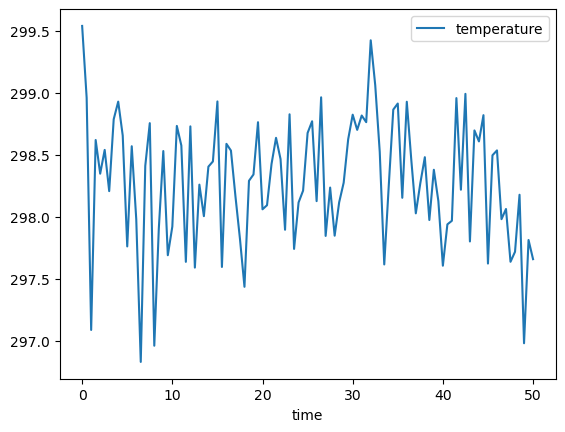

In [2]:
!echo "Temperature" | gmx energy -f npt.edr -o npt_temperature.xvg -xvg none

df = pd.read_csv('npt_temperature.xvg', sep='\\s+', header=None, names=['time','temperature'])
df.plot('time')

Plot P(t)

                      :-) GROMACS - gmx energy, 2024.5 (-:

Executable:   /public/BioPhys/yym/opt/gromacs-2024.5/bin/gmx
Data prefix:  /public/BioPhys/yym/opt/gromacs-2024.5
Working dir:  /public/BioPhys/yym/rep/001/F1/long
Command line:
  gmx energy -f npt.edr -o npt_pressure.xvg -xvg none

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Kinetic-En.   
 13  Total-Energy    14  Temperature     15  Pres.-DC        16  Pressure      
 17  Constr.-rmsd    18  Box-X           19  Box-Y           20  Box-Z         
 21  Volume          

<Axes: xlabel='time'>

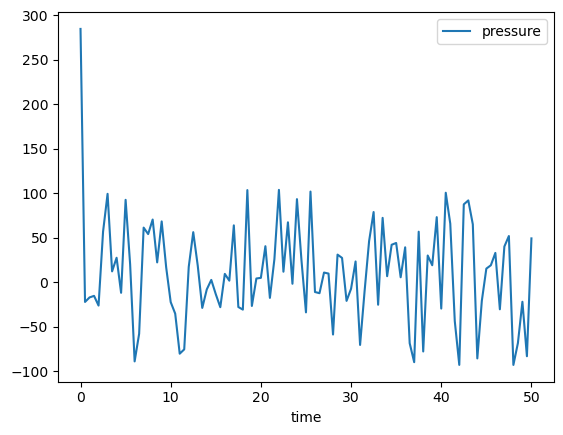

In [3]:
!echo "Pressure" | gmx energy -f npt.edr -o npt_pressure.xvg -xvg none

df = pd.read_csv('npt_pressure.xvg', sep='\\s+', header=None, names=['time','pressure'])
df.plot('time')

Plot D(t)

                      :-) GROMACS - gmx energy, 2024.5 (-:

Executable:   /public/BioPhys/yym/opt/gromacs-2024.5/bin/gmx
Data prefix:  /public/BioPhys/yym/opt/gromacs-2024.5
Working dir:  /public/BioPhys/yym/rep/001/F1/long
Command line:
  gmx energy -f npt.edr -o npt_density.xvg -xvg none

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Bond             2  Angle            3  Proper-Dih.      4  Per.-Imp.-Dih.
  5  LJ-14            6  Coulomb-14       7  LJ-(SR)          8  Disper.-corr. 
  9  Coulomb-(SR)    10  Coul.-recip.    11  Potential       12  Kinetic-En.   
 13  Total-Energy    14  Temperature     15  Pres.-DC        16  Pressure      
 17  Constr.-rmsd    18  Box-X           19  Box-Y           20  Box-Z         
 21  Volume          2

<Axes: xlabel='time'>

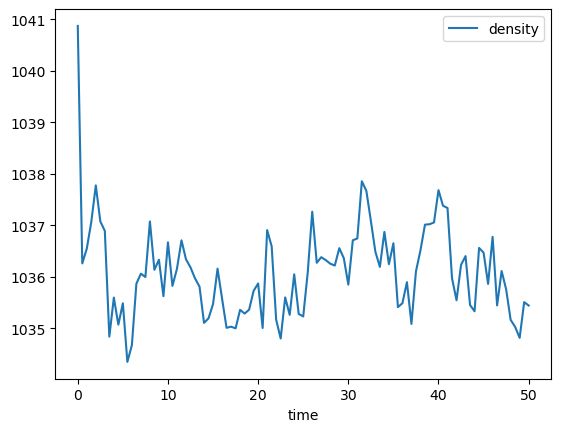

In [4]:
!echo "Density" | gmx energy -f npt.edr -o npt_density.xvg -xvg none

df = pd.read_csv('npt_density.xvg', sep='\\s+', header=None, names=['time','density'])
df.plot('time')

Center the trajectory file

In [5]:
!printf "1\n0\n" | gmx trjconv -f npt.trr -s npt.tpr -o npt_center.trr -center -pbc mol
!printf "1\n1\n" | gmx trjconv -f npt.trr -s npt.tpr -o npt_protein_center.trr -center -pbc mol

                     :-) GROMACS - gmx trjconv, 2024.5 (-:

Executable:   /public/BioPhys/yym/opt/gromacs-2024.5/bin/gmx
Data prefix:  /public/BioPhys/yym/opt/gromacs-2024.5
Working dir:  /public/BioPhys/yym/rep/001/F1/long
Command line:
  gmx trjconv -f npt.trr -s npt.tpr -o npt_center.trr -center -pbc mol

Note that major changes are planned in future for trjconv, to improve usability and utility.
Will write trr: Trajectory in portable xdr format
Reading file npt.tpr, VERSION 2024.5 (single precision)
Reading file npt.tpr, VERSION 2024.5 (single precision)
Select group for centering
Group     0 (         System) has 320275 elements
Group     1 (        Protein) has 47656 elements
Group     2 (      Protein-H) has 23735 elements
Group     3 (        C-alpha) has  3093 elements
Group     4 (       Backbone) has  9279 elements
Group     5 (      MainChain) has 12379 elements
Group     6 (   MainChain+Cb) has 15188 elements
Group     7 (    MainChain+H) has 15330 elements
Group     8 (  

Plot the trajectory of protein

In [8]:
traj = md.load("npt_protein_center.trr", top="F1_newbox.gro")
view = ng.show_mdtraj(traj)
view

NGLWidget(max_frame=100)

Evaluate structural stability with RMSD

                       :-) GROMACS - gmx rms, 2024.5 (-:

Executable:   /public/BioPhys/yym/opt/gromacs-2024.5/bin/gmx
Data prefix:  /public/BioPhys/yym/opt/gromacs-2024.5
Working dir:  /public/BioPhys/yym/rep/001/F1/long
Command line:
  gmx rms -s em1.tpr -f npt_center.trr -o rmsd_xray.xvg -tu ns -xvg none

Reading file em1.tpr, VERSION 2024.5 (single precision)
Reading file em1.tpr, VERSION 2024.5 (single precision)
Select group for least squares fit
Group     0 (         System) has 320275 elements
Group     1 (        Protein) has 47656 elements
Group     2 (      Protein-H) has 23735 elements
Group     3 (        C-alpha) has  3093 elements
Group     4 (       Backbone) has  9279 elements
Group     5 (      MainChain) has 12379 elements
Group     6 (   MainChain+Cb) has 15188 elements
Group     7 (    MainChain+H) has 15330 elements
Group     8 (      SideChain) has 32326 elements
Group     9 (    SideChain-H) has 11356 elements
Group    10 (    Prot-Masses) has 47656 elements
Gro

<Axes: xlabel='time'>

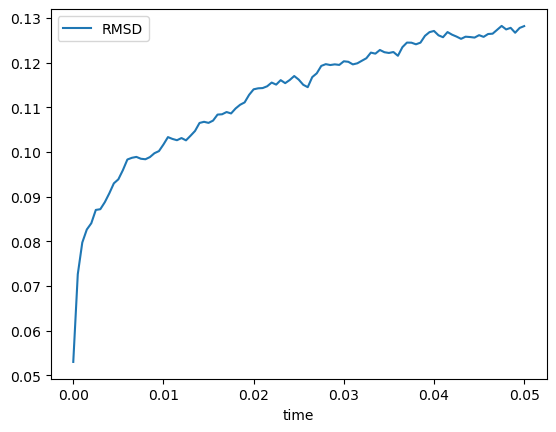

In [12]:
!printf "4\n1\n" | gmx rms -s em1.tpr -f npt_center.trr -o rmsd_xray.xvg -tu ns -xvg none

df = pd.read_csv('rmsd_xray.xvg', sep='\\s+', header=None, names=['time','RMSD'])
df.plot('time')

Measure compactness with radius of gyration

                      :-) GROMACS - gmx gyrate, 2024.5 (-:

Executable:   /public/BioPhys/yym/opt/gromacs-2024.5/bin/gmx
Data prefix:  /public/BioPhys/yym/opt/gromacs-2024.5
Working dir:  /public/BioPhys/yym/rep/001/F1/long
Command line:
  gmx gyrate -f npt_center.trr -s npt.tpr -o gyrate.xvg -xvg none

Reading file npt.tpr, VERSION 2024.5 (single precision)
Reading file npt.tpr, VERSION 2024.5 (single precision)
trr version: GMX_trn_file (single precision)
Last frame        100 time   50.000   
Analyzed 101 frames, last time 50.000

GROMACS reminds you: "Martin [Karplus] had a green laser, Arieh [Warshel] had a red laser, I have a *blue* laser" (Michael Levitt, Nobel lecture 2013)



<Axes: xlabel='time'>

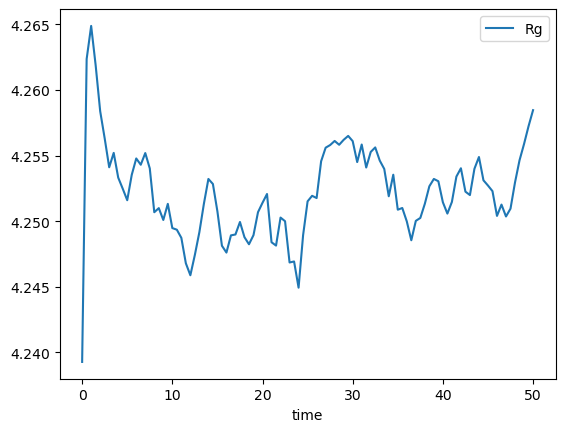

In [13]:
!echo "1" | gmx gyrate -f npt_center.trr -s npt.tpr -o gyrate.xvg -xvg none

df = pd.read_csv('gyrate.xvg', sep='\\s+', header=None, names=['time','Rg'], usecols=[0, 1])
df.plot('time')

Generate the index file including Chain G

In [14]:
!printf "a 43171 - 47656\nname 17 chainG\nq\n" | gmx make_ndx -f npt.tpr -o index.ndx

                     :-) GROMACS - gmx make_ndx, 2024.5 (-:

Executable:   /public/BioPhys/yym/opt/gromacs-2024.5/bin/gmx
Data prefix:  /public/BioPhys/yym/opt/gromacs-2024.5
Working dir:  /public/BioPhys/yym/rep/001/F1/long
Command line:
  gmx make_ndx -f npt.tpr -o index.ndx


Reading structure file
Reading file npt.tpr, VERSION 2024.5 (single precision)
Reading file npt.tpr, VERSION 2024.5 (single precision)
Going to read 0 old index file(s)
Analysing residue names:
There are:  3093    Protein residues
There are: 90838      Water residues
There are:   105        Ion residues
Analysing Protein...

  0 System              : 320275 atoms
  1 Protein             : 47656 atoms
  2 Protein-H           : 23735 atoms
  3 C-alpha             :  3093 atoms
  4 Backbone            :  9279 atoms
  5 MainChain           : 12379 atoms
  6 MainChain+Cb        : 15188 atoms
  7 MainChain+H         : 15330 atoms
  8 SideChain           : 32326 atoms
  9 SideChain-H         : 11356 atoms
 10 Prot-Mas

Extract the coordinates, velocities, forces and center of mass (chain G)

In [15]:
!printf "1\n" | gmx traj -f npt_center.trr -s npt.tpr -dt 2.5 -ox coords.xvg -xvg none
!printf "1\n" | gmx traj -f npt_center.trr -s npt.tpr -dt 2.5 -ov velocities.xvg -xvg none
!printf "1\n" | gmx traj -f npt.trr -s npt.tpr -dt 2.5 -of forces.xvg -xvg none
!printf "17\n" | gmx traj -f npt_center.trr -s npt.tpr -n index.ndx -com -dt 2.5 -ox com_coords.xvg -xvg none

                       :-) GROMACS - gmx traj, 2024.5 (-:

Executable:   /public/BioPhys/yym/opt/gromacs-2024.5/bin/gmx
Data prefix:  /public/BioPhys/yym/opt/gromacs-2024.5
Working dir:  /public/BioPhys/yym/rep/001/F1/long
Command line:
  gmx traj -f npt_center.trr -s npt.tpr -dt 2.5 -ox coords.xvg -xvg none

Reading file npt.tpr, VERSION 2024.5 (single precision)
Reading file npt.tpr, VERSION 2024.5 (single precision)
Group     0 (         System) has 320275 elements
Group     1 (        Protein) has 47656 elements
Group     2 (      Protein-H) has 23735 elements
Group     3 (        C-alpha) has  3093 elements
Group     4 (       Backbone) has  9279 elements
Group     5 (      MainChain) has 12379 elements
Group     6 (   MainChain+Cb) has 15188 elements
Group     7 (    MainChain+H) has 15330 elements
Group     8 (      SideChain) has 32326 elements
Group     9 (    SideChain-H) has 11356 elements
Group    10 (    Prot-Masses) has 47656 elements
Group    11 (    non-Protein) has 272

# Calculate Torque

In [16]:
!python Extract.py

已生成: ./frame_0.csv (原子数: 47656)
已生成: ./frame_2.5.csv (原子数: 47656)
已生成: ./frame_5.csv (原子数: 47656)
已生成: ./frame_7.5.csv (原子数: 47656)
已生成: ./frame_10.csv (原子数: 47656)
已生成: ./frame_12.5.csv (原子数: 47656)
已生成: ./frame_15.csv (原子数: 47656)
已生成: ./frame_17.5.csv (原子数: 47656)
已生成: ./frame_20.csv (原子数: 47656)
已生成: ./frame_22.5.csv (原子数: 47656)
已生成: ./frame_25.csv (原子数: 47656)
已生成: ./frame_27.5.csv (原子数: 47656)
已生成: ./frame_30.csv (原子数: 47656)
已生成: ./frame_32.5.csv (原子数: 47656)
已生成: ./frame_35.csv (原子数: 47656)
已生成: ./frame_37.5.csv (原子数: 47656)
已生成: ./frame_40.csv (原子数: 47656)
已生成: ./frame_42.5.csv (原子数: 47656)
已生成: ./frame_45.csv (原子数: 47656)
已生成: ./frame_47.5.csv (原子数: 47656)
已生成: ./frame_50.csv (原子数: 47656)
已生成: ./frame_0.csv (原子数: 47656)
已生成: ./frame_2.5.csv (原子数: 47656)
已生成: ./frame_5.csv (原子数: 47656)
已生成: ./frame_7.5.csv (原子数: 47656)
已生成: ./frame_10.csv (原子数: 47656)
已生成: ./frame_12.5.csv (原子数: 47656)
已生成: ./frame_15.csv (原子数: 47656)
已生成: ./frame_17.5.csv (原子数: 47656)
已生成: ./frame_20.csv (原子

In [17]:
!python Torque.py

time series: ['0', '2.5', '5', '7.5', '10', '12.5', '15', '17.5', '20', '22.5', '25', '27.5', '30', '32.5', '35', '37.5', '40', '42.5', '45', '47.5', '50']
质心坐标: [7.85757, 13.9068, 6.42342]
轴向量由原子 47605 和 44603 确定
轴方向向量: [-0.0318205093, 0.9981570129, -0.0516723591]
质心与轴的距离: 0.046525941142700825
轴总力矩: 96474.34379762824
转子部分轴总力矩: 15334.505394814758

前5个原子的力矩值:
   Center_Number  Torque_Axis
0            1.0 -3962.504195
1            2.0 -2498.634967
2            3.0  -448.266330
3            4.0 -2619.684975
4            5.0  1081.978938
质心坐标: [7.83121, 13.9638, 6.45854]
轴向量由原子 47605 和 44603 确定
轴方向向量: [-0.0311096080, 0.9981814061, -0.0516340284]
质心与轴的距离: 0.11382214665662589
轴总力矩: -116450.86888460892
转子部分轴总力矩: 10548.440056657182

前5个原子的力矩值:
   Center_Number   Torque_Axis
0            1.0  11856.413796
1            2.0  -3224.943097
2            3.0   1659.923229
3            4.0  -2645.278882
4            5.0 -11806.282225
质心坐标: [7.79466, 13.9757, 6.47499]
轴向量由原子 47605 和 44603 确定
轴方向向量: [-

<Axes: xlabel='time'>

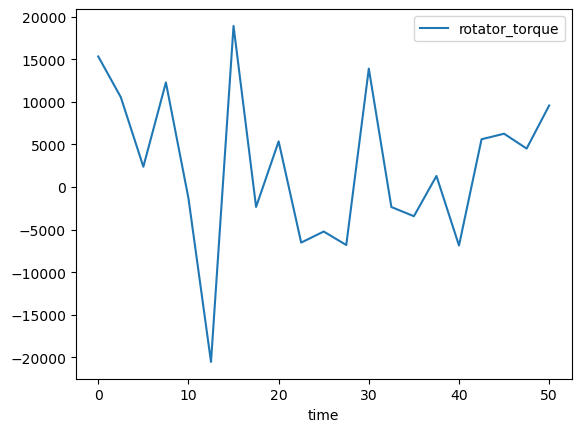

In [2]:
df = pd.read_csv('torque_summary.csv', usecols=['time', 'rotator_torque'])
df.plot('time')